In [70]:
import pandas as pd
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs 
import plotly.tools

from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv("../training_data.csv", encoding = "ISO-8859-1", header=None).iloc[:, 5]

print(df.head())

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: 5, dtype: object


# Data Exploration

In [23]:
tweet_length = df.iloc[:,].str.len()

tweet_length.mean(), tweet_length.std(), tweet_length.max()

(74.09011125, 36.44113875397364, 374)

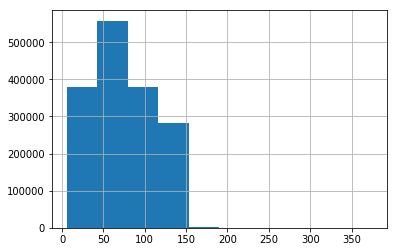

In [24]:
tweet_length.hist()

# Word Counts

In [ ]:
vocab = df.iloc[:,].str.split(expand=True).unstack().value_counts()

In [55]:
graph = [plotly.graph_objs.Bar(
            x = vocab.index.values[0:49],
            y = vocab.values[0:49],
            marker = dict(colorscale='Jet', color = vocab.values[0:100]),
            text = 'Frequency'
        )]
layout = plotly.graph_objs.Layout(title='Top 50 word counts in the tweets')

figure = plotly.graph_objs.Figure(data=graph, layout=layout)

py.iplot(figure)

# Wordcloud - Most Frequent Occuring Words

In [76]:
words= df.iloc[:,].values

In [83]:
def word_cloud(title, word_list, bg_color, image_path):
    mask=np.array(Image.open(image_path))
    mask=mask[:,:,1]
    plt.figure(figsize=(10,10), dpi=300)
    wc = WordCloud(max_words=400, mask=mask
                 , stopwords=STOPWORDS, max_font_size= 80, collocations=False, random_state=5)
    wc.generate(" ".join(word_list))
    plt.title(title +" Comments - WordCloud", fontsize=24)

    plt.imshow(wc.recolor( colormap='Pastel1_r', random_state=1), alpha=0.98)
    plt.axis('off')
    plt.show()
    plt.close()

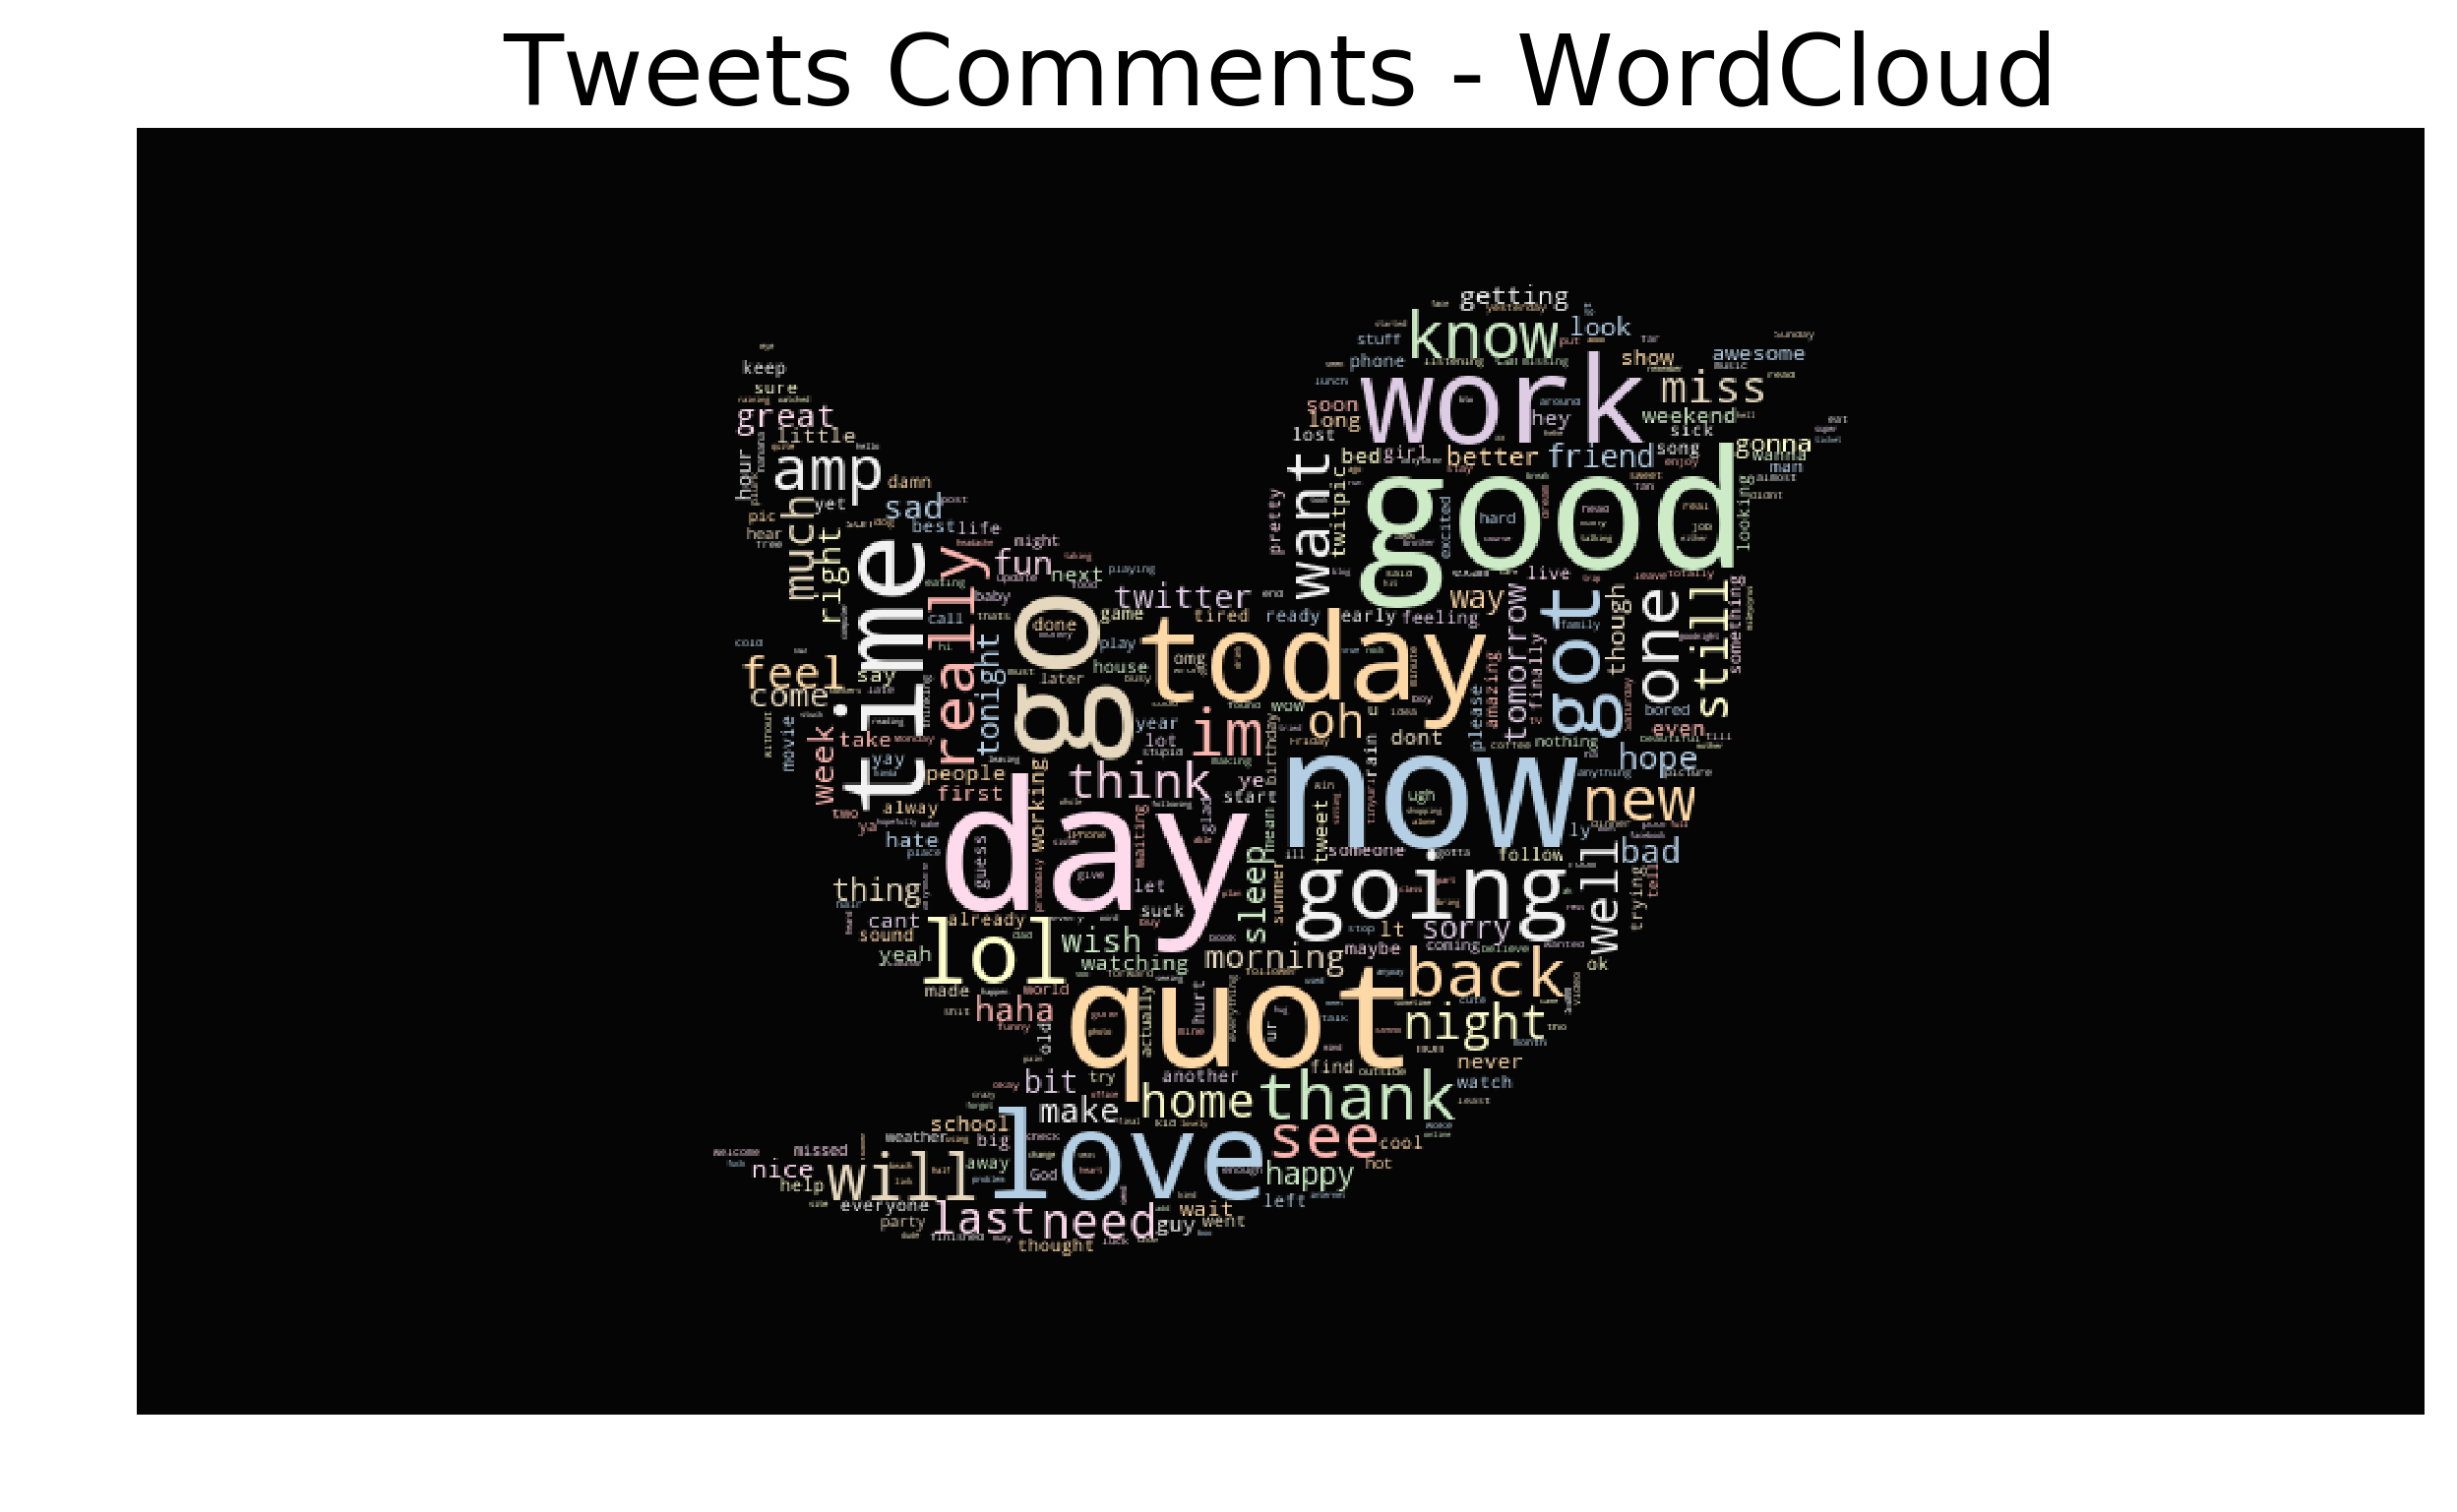

In [84]:
word_cloud(title="Tweets", word_list=words, bg_color='black', image_path='../images/twitter.jpg')